In [1]:
#import the california housing dataset from sklearn.datasets package
from sklearn.datasets import fetch_california_housing
#import train_test_split to split the dataset into train and test set
from sklearn.model_selection import train_test_split
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#storing the dataset in a variable
dataset = fetch_california_housing()
#what's inside the dataset?
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
#description of the dataset e.g. number of instances and attributes, information about the attributes etc. 
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# Convert the dataset to a pandas dataframe and check statistics

In [4]:
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
df["Y"] = dataset.target
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [5]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Y             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Y           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Attribute combinations

In [7]:
df.insert(8, "bedrooms_rooms_ratio", df["AveBedrms"] / df["AveRooms"])
corr = df.corr()
corr["Y"].sort_values(ascending = False)

Y                       1.000000
MedInc                  0.688075
AveRooms                0.151948
HouseAge                0.105623
AveOccup               -0.023737
Population             -0.024650
Longitude              -0.045967
AveBedrms              -0.046701
Latitude               -0.144160
bedrooms_rooms_ratio   -0.255624
Name: Y, dtype: float64

Bedrooms and Rooms ratio seems to have much more correlation with the target than the single average bedrooms and total rooms attributes. I will use the two of the most correlated attributes with the target: MedInc and bedrooms_rooms_ratio. 

In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,bedrooms_rooms_ratio,Y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,0.213075,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,0.058023,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.100000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,0.175426,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,0.203181,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,0.239834,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,1.000000,5.000010


Notice the ranges of the variables are not similar or even close. It's usually good to scale the variables to a range. To scale the attributes use normalization or standardization technique. Feature scaling often helps the algorithm to converge faster.

# Feature scaling (Normalization)

In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(df)
type(scaled_data)

numpy.ndarray

In [10]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [11]:
dataset.feature_names.append("bedrooms_rooms_ratio")
dataset.feature_names.append("Y")
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'bedrooms_rooms_ratio',
 'Y']

In [12]:
df = pd.DataFrame(scaled_data)
df.columns = dataset.feature_names

In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,bedrooms_rooms_ratio,Y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125,0.125638,0.395579
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555,0.064471,0.237928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984,0.083806,0.215671
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665,0.114645,0.339588
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474,0.155372,0.514897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now all the attributes are rescaled to a range 0 to 1. I have made it easy for the algorithm to converge faster.

But there's another thing to consider. It's good to randomize the instances before training. Since it's possible that there's some bias in the data. So it's always good to shuffle the dataset before going to apply the algorithm. Otherwise the trained model will not perform well if there's any sort of bias in the dataset.

# Randomize the training instances

In [14]:
#randomize the intstances before splitting the dataset into train and test set
from sklearn.utils import shuffle
df = shuffle(df, random_state = 9)
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,bedrooms_rooms_ratio,Y
20558,0.279493,0.176471,0.033123,0.019920,0.029990,0.001727,0.651435,0.253984,0.091296,0.287424
11430,0.369250,0.411765,0.039712,0.019421,0.052356,0.001923,0.119022,0.635458,0.059218,0.549484
2656,0.099433,0.607843,0.048212,0.056541,0.012080,0.001311,0.822529,0.009960,0.214452,0.125981
14267,0.075406,0.705882,0.022346,0.021149,0.069677,0.002787,0.015940,0.721116,0.179773,0.147012
3684,0.183197,0.686275,0.026569,0.022013,0.033017,0.002579,0.177471,0.595618,0.149106,0.332784
17826,0.363416,0.039216,0.028215,0.021470,0.070602,0.001493,0.514346,0.245020,0.132366,0.528660
6766,0.186039,0.450980,0.023907,0.021852,0.069369,0.001244,0.165781,0.619522,0.170830,0.489485
1029,0.127929,0.333333,0.034028,0.028324,0.017237,0.001238,0.625930,0.378486,0.142512,0.193610
7108,0.257190,0.627451,0.039327,0.020411,0.028448,0.002003,0.143464,0.631474,0.066471,0.407835
9840,0.137398,0.392157,0.018324,0.017961,0.023291,0.001297,0.432519,0.242032,0.193058,0.471753


# Split the dataset into train and test set

Split the dataset into train and test set. Since I have already shuffled the dataset so I set the train_test_split parameter shuffle to False.

In [15]:
#split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(df[df.keys()[:9]], df[df.keys()[9]], test_size = 0.2, shuffle = False)
#test_size = 0.2 means 20% of the data will be used for testing

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 9), (16512,), (4128, 9), (4128,))

In [17]:
X_train.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,bedrooms_rooms_ratio
20558,0.279493,0.176471,0.033123,0.019920,0.029990,0.001727,0.651435,0.253984,0.091296
11430,0.369250,0.411765,0.039712,0.019421,0.052356,0.001923,0.119022,0.635458,0.059218
2656,0.099433,0.607843,0.048212,0.056541,0.012080,0.001311,0.822529,0.009960,0.214452
14267,0.075406,0.705882,0.022346,0.021149,0.069677,0.002787,0.015940,0.721116,0.179773
3684,0.183197,0.686275,0.026569,0.022013,0.033017,0.002579,0.177471,0.595618,0.149106


In [18]:
y_train.head(5)

20558    0.287424
11430    0.549484
2656     0.125981
14267    0.147012
3684     0.332784
Name: Y, dtype: float64

# EDA and Feature engineering

In [19]:
#run functions from another notebook named plot-functions.ipynb
%run plot_funcs.ipynb

In [20]:
eda_data = df.copy()

## Data distribution of each variable and the target

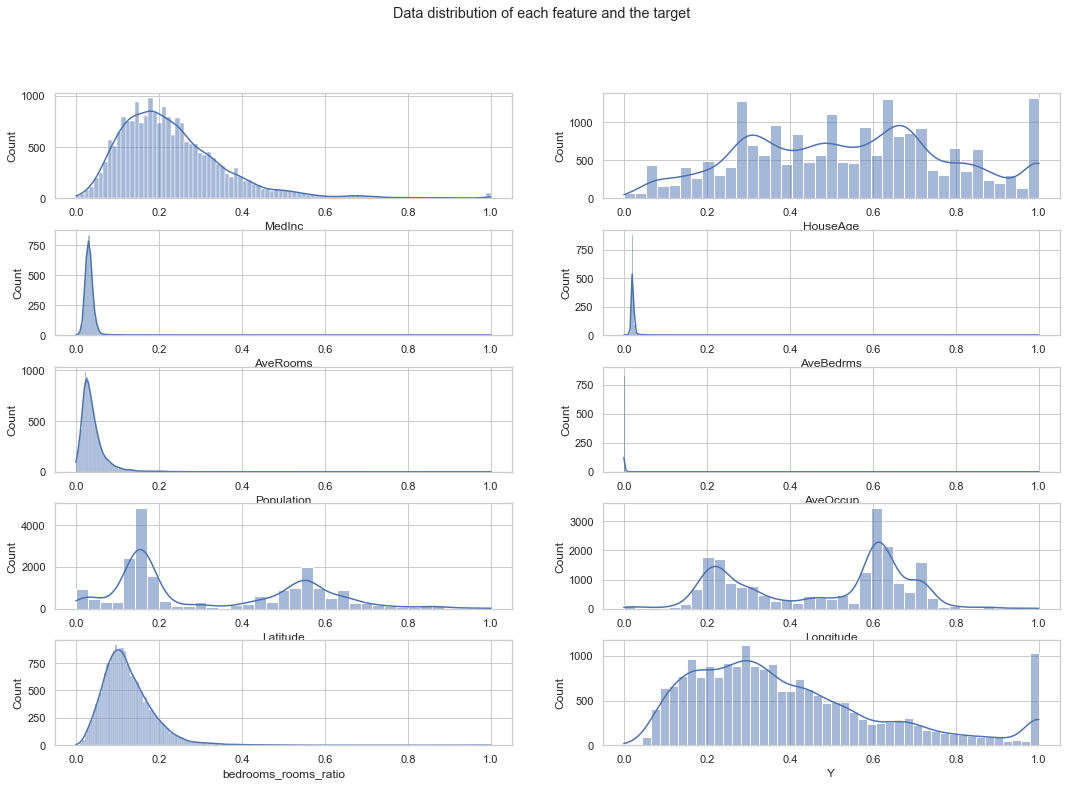

In [21]:
histplot(5, 2, data = eda_data, grid = "whitegrid", hspace = 0.3, figsize = (18, 12), suptitle = "Data distribution of each feature and the target")

## Pairwise relationships between the variables and the target

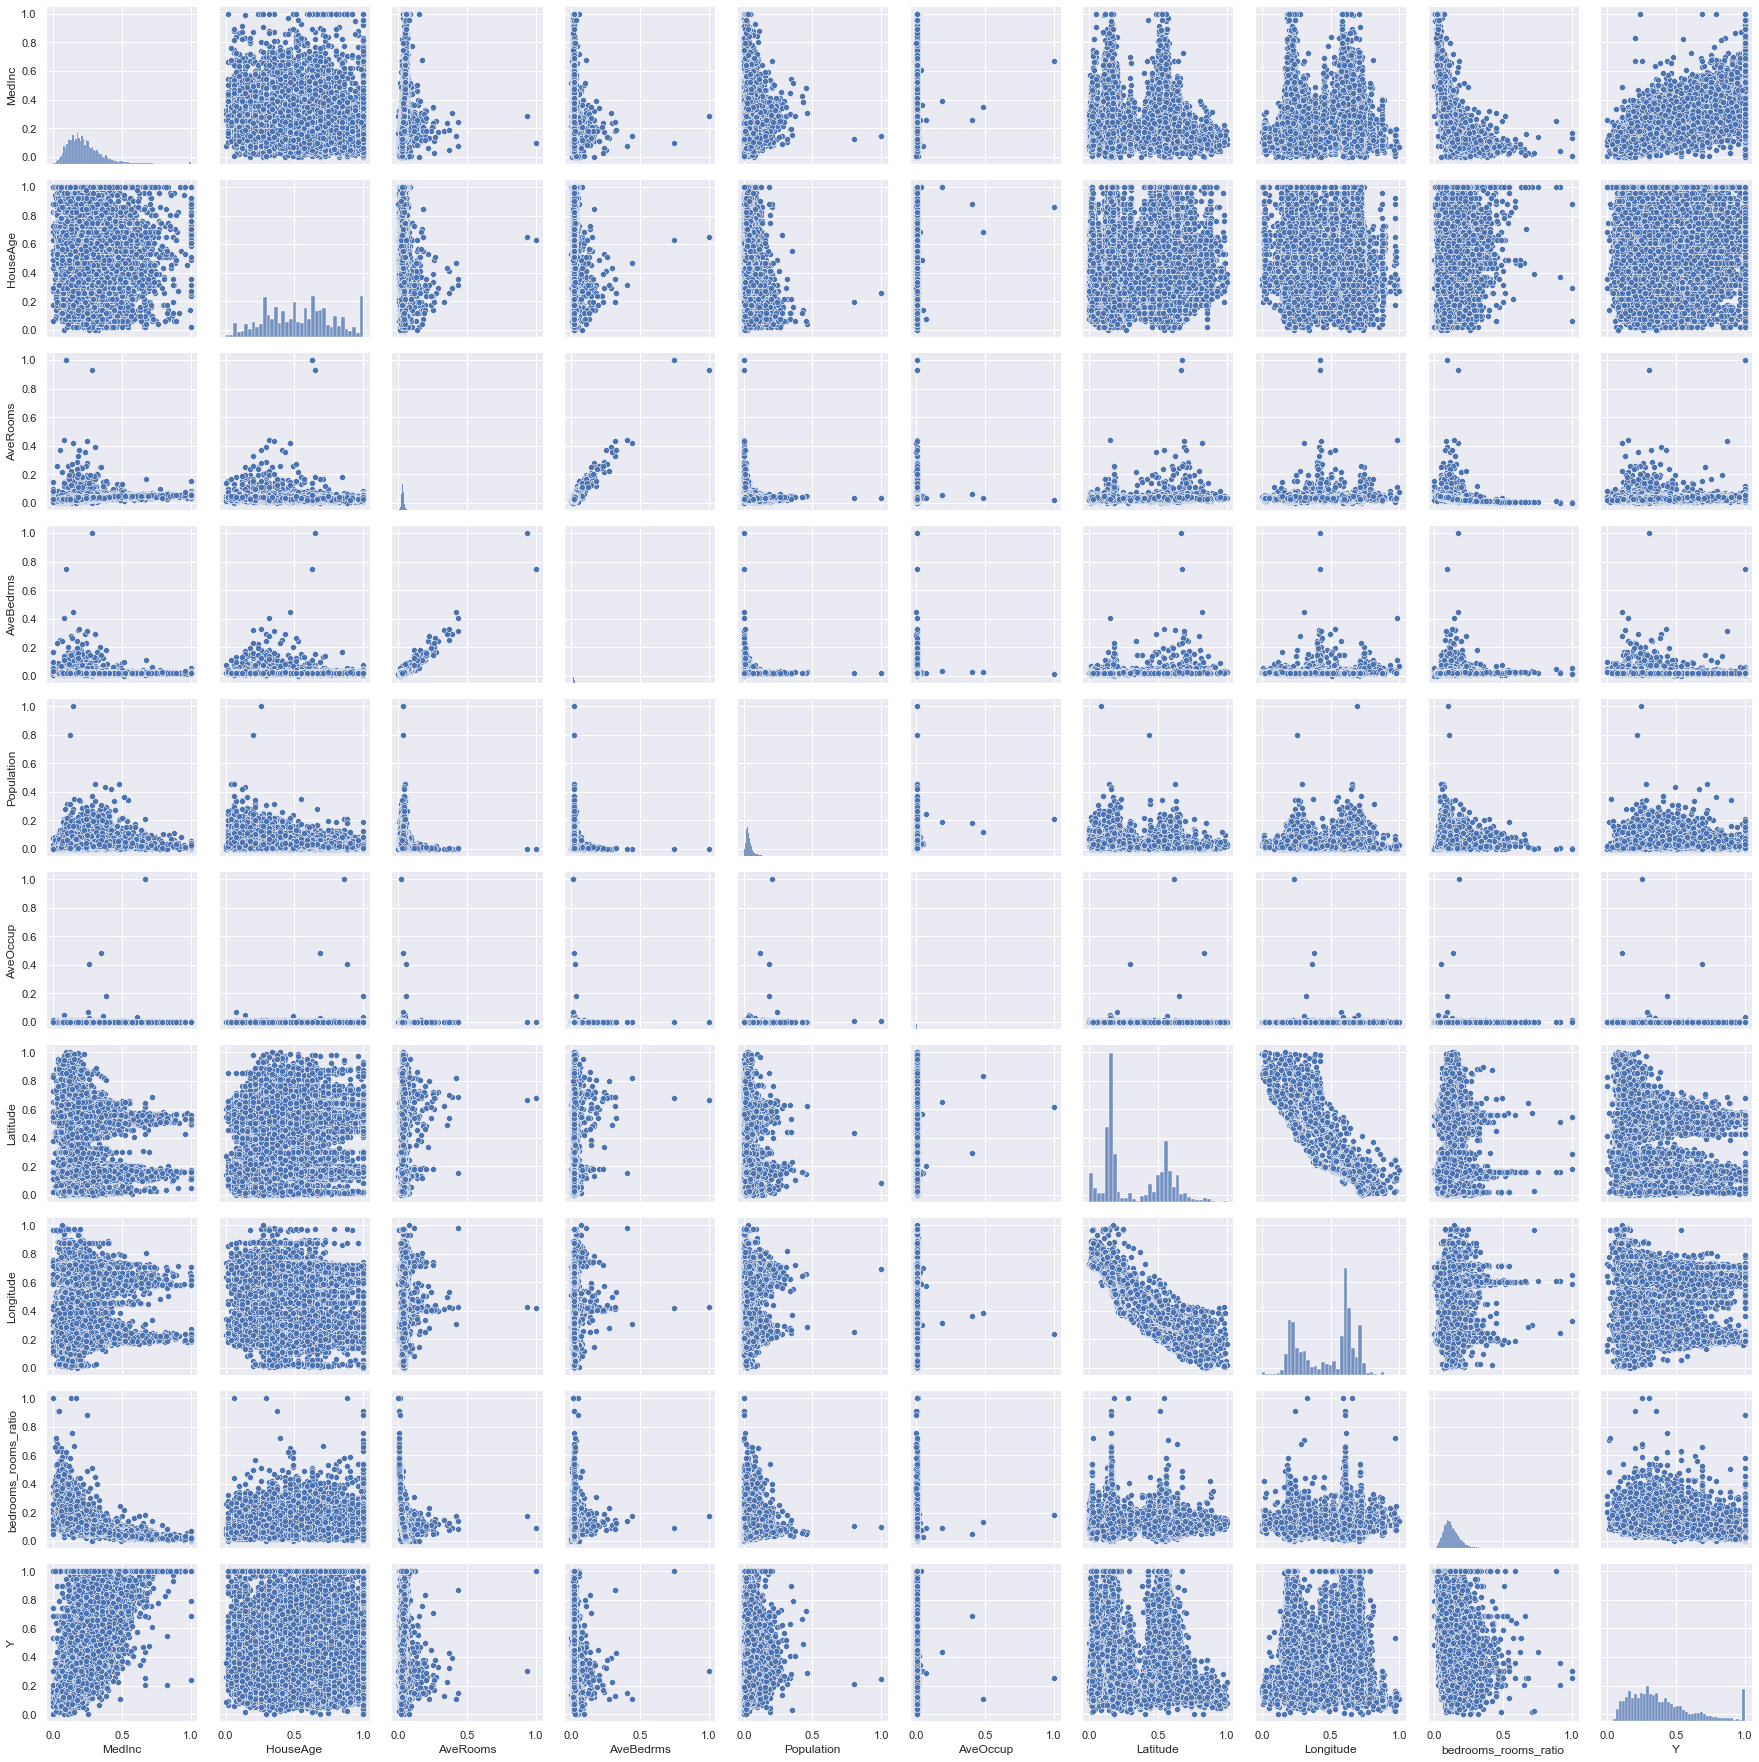

In [22]:
#pairwise relationships between the variables and the target
pairgrid(data = eda_data, diag = sns.histplot, upper = sns.scatterplot, lower = sns.scatterplot)

## Correlation matrix

Correlation matrix visualize the linear relationships between the variables and the target. The correlation coefficient ranges from -1 to 1. If the value is close to 1, there's a strong positive correlation between the variables. There's a strong negative correlation if the value is close to -1. It's recommened to use the variables that are highly correlated with the target and omit the other variables.

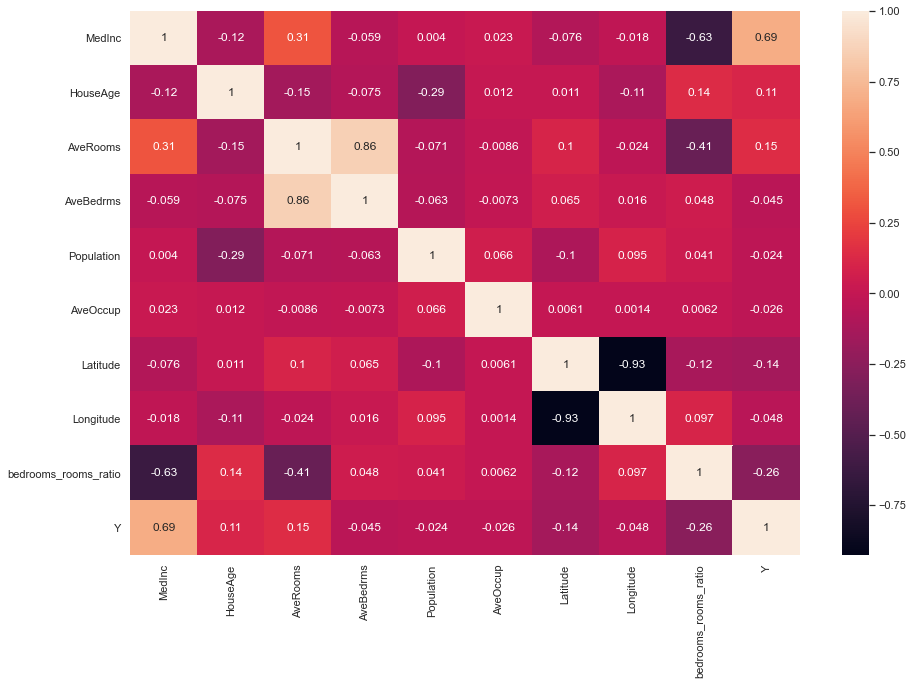

In [23]:
sns.set(rc = {"figure.figsize": (15, 10)})
df = pd.concat([X_train, y_train], axis = 1)
corr_matrix = df.corr()
sns.heatmap(data = corr_matrix, annot = True)
#prints the values inside the squares if annot is True
plt.show()

We should choose the variables that are highly correlated with the target. But always check for multi-co-linearity while choosing the attributes. If two features are highly correlated with the target and those two are strongly correlated with each other then choose one of those, not both. In this dataset features "MedInc" and "bedrooms_rooms_ratio" are highly correlated with the target "Y". But those two features are correlated with each other strongly, correlation coefficient = -0.63. If two features are correlated strongly that means their combination will not help much (think about similar attributes give correlation coefficient = 1). But for experimentation I will use both of the features here.

## Boxplot and Violinplot to check if there's any outlier

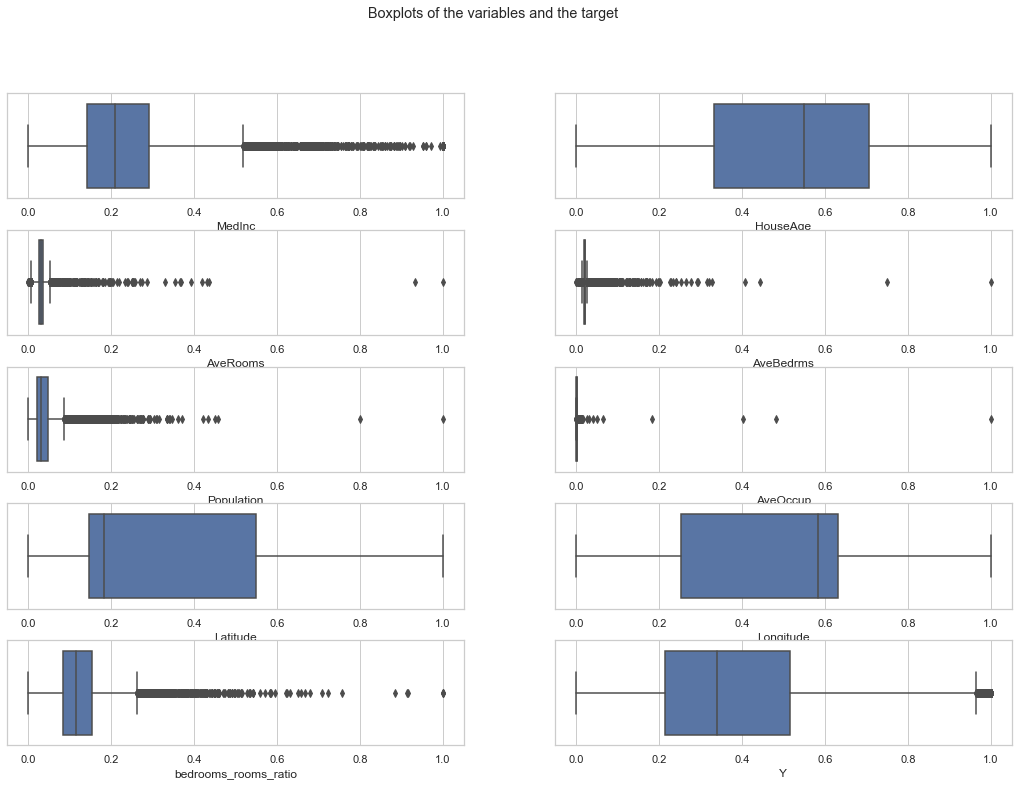

In [24]:
boxplot(5, 2, data = eda_data, grid = "whitegrid", hspace = 0.3, figsize = (18, 12), suptitle = "Boxplots of the variables and the target")

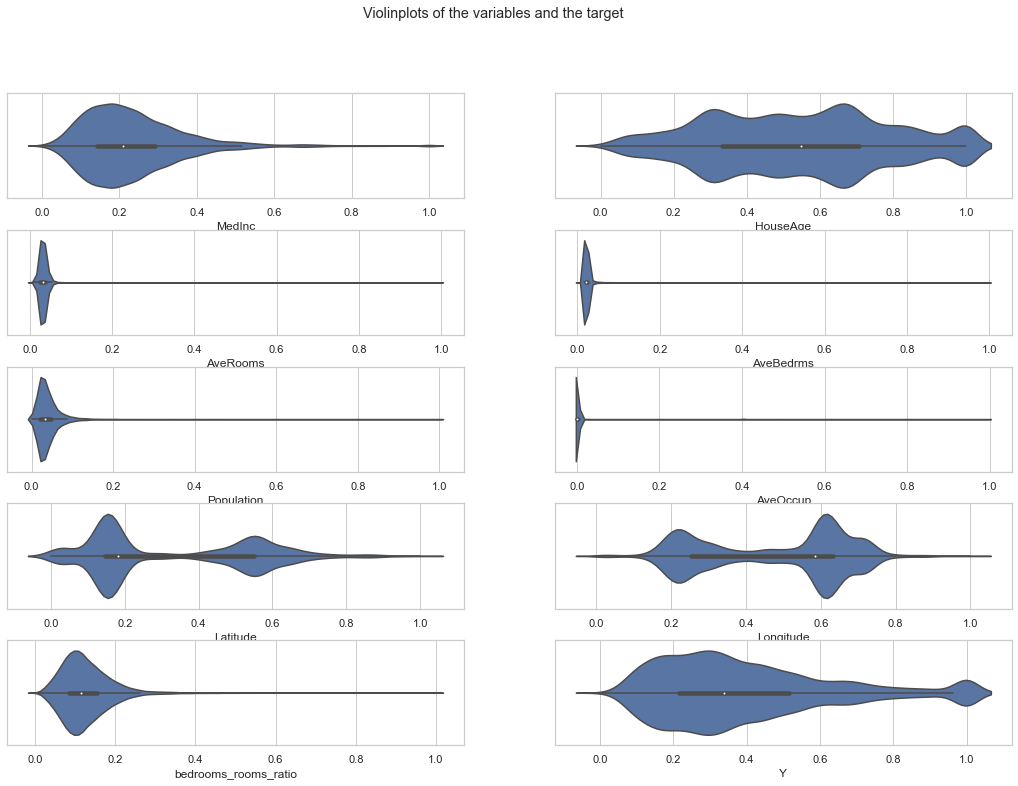

In [25]:
violinplot(5, 2, data = eda_data, grid = "whitegrid", hspace = 0.3, figsize = (18, 12), suptitle = "Violinplots of the variables and the target")

Though there's some outliers e.g. price caps, I will not remove or modify those points. My goal is to implement Gradient Descent and see how it works not optimizing the dataset and increase the generalization accuracy in this project.

# Creating a simple dataset for Gradient Descent

In [26]:
X_train = pd.concat([X_train["MedInc"], X_train["bedrooms_rooms_ratio"]], axis = 1)
X_train.head()

,MedInc,bedrooms_rooms_ratio
20558,0.279493,0.091296
11430,0.369250,0.059218
2656,0.099433,0.214452
14267,0.075406,0.179773
3684,0.183197,0.149106


In [27]:
y_train

20558    0.287424
11430    0.549484
2656     0.125981
14267    0.147012
3684     0.332784
           ...   
9909     0.252578
3531     0.687010
7735     0.364743
4350     1.000000
4363     0.842679
Name: Y, Length: 16512, dtype: float64

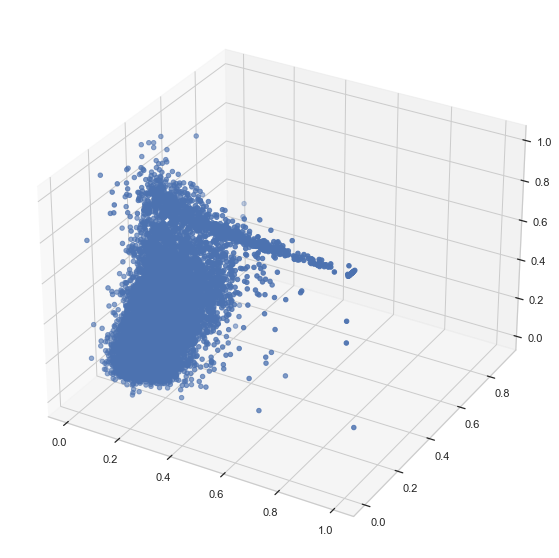

In [28]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (18, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train)
plt.show()

In [29]:
X_train.iloc[:, 1]

20558    0.091296
11430    0.059218
2656     0.214452
14267    0.179773
3684     0.149106
           ...   
9909     0.133123
3531     0.033252
7735     0.159598
4350     0.086022
4363     0.089681
Name: bedrooms_rooms_ratio, Length: 16512, dtype: float64

In [34]:
%store X_train y_train

Stored 'X_train' (DataFrame)
Stored 'y_train' (Series)
